<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [2]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [3]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-3-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [4]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [5]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


Text(0.5, 1.0, 'Median Value of Homes')

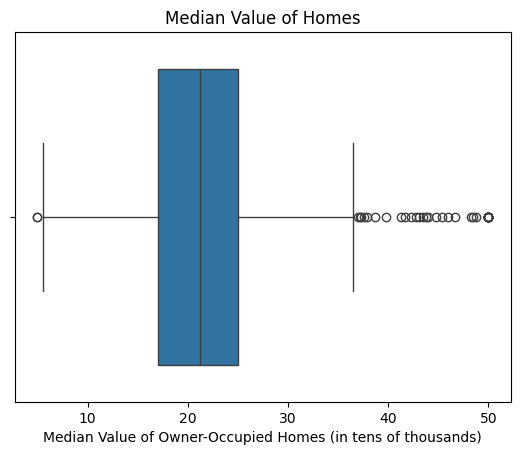

In [8]:
box1= sns.boxplot(x='MEDV',data=boston_df)
box1.set_xlabel("Median Value of Owner-Occupied Homes (in tens of thousands)")
box1.set_title("Median Value of Homes")

Text(0.5, 1.0, 'Number of Houses Bound by the Charles River')

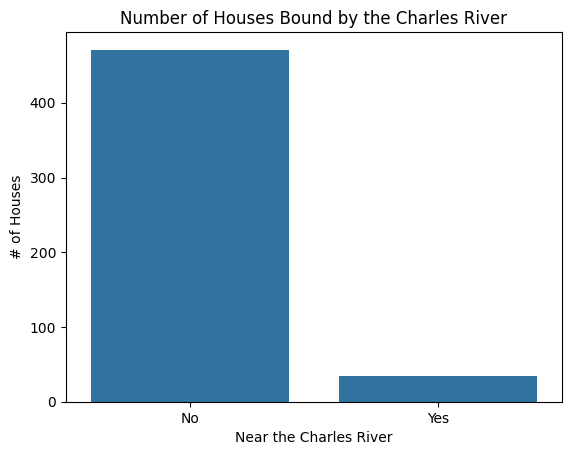

In [9]:
bar=sns.countplot(x='CHAS',data=boston_df)
bar.set_xlabel("Near the Charles River")
bar.set_ylabel("# of Houses")
bar.set_xticks([0, 1])
bar.set_xticklabels(['No', 'Yes'])
bar.set_title("Number of Houses Bound by the Charles River")

In [10]:
boston_df.loc[boston_df["AGE"]<=35,'AgeGroup']='35 years and below'
boston_df.loc[(boston_df["AGE"]>35) & (boston_df["AGE"]<70),'AgeGroup']='Between 35 and 70 years'
boston_df.loc[boston_df["AGE"]>70,'AgeGroup']='Above 70 years'

Text(0.5, 1.0, 'Median Value of Homes by Number of Years Built Prior to 1940')

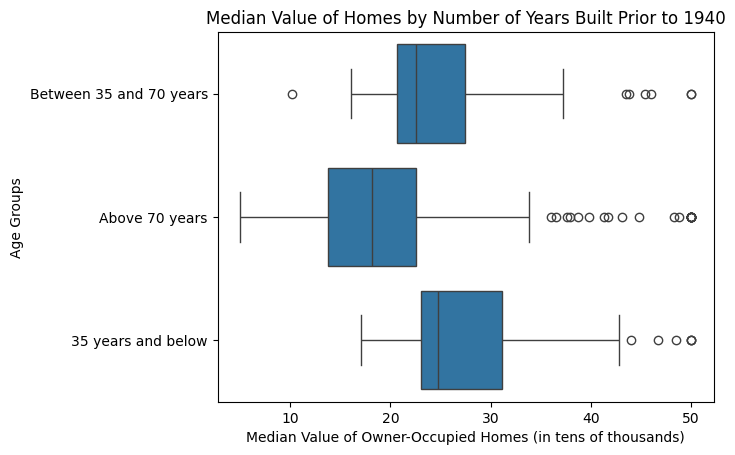

In [11]:
box2=sns.boxplot(x="MEDV",y="AgeGroup",data=boston_df)
box2.set_xlabel("Median Value of Owner-Occupied Homes (in tens of thousands)")
box2.set_ylabel("Age Groups")
box2.set_title("Median Value of Homes by Number of Years Built Prior to 1940")

Text(0.5, 1.0, 'Industrial Acres Per Town vs Nitrous Oxide Concentrations')

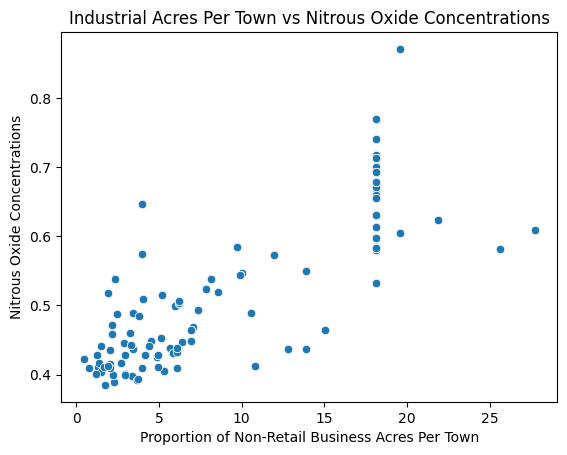

In [12]:
scatter=sns.scatterplot(x="INDUS",y="NOX",data=boston_df)
scatter.set_ylabel("Nitrous Oxide Concentrations")
scatter.set_xlabel("Proportion of Non-Retail Business Acres Per Town")
scatter.set_title("Industrial Acres Per Town vs Nitrous Oxide Concentrations")

Text(0.5, 1.0, 'Distribution of Pupil to Teacher Ratio')

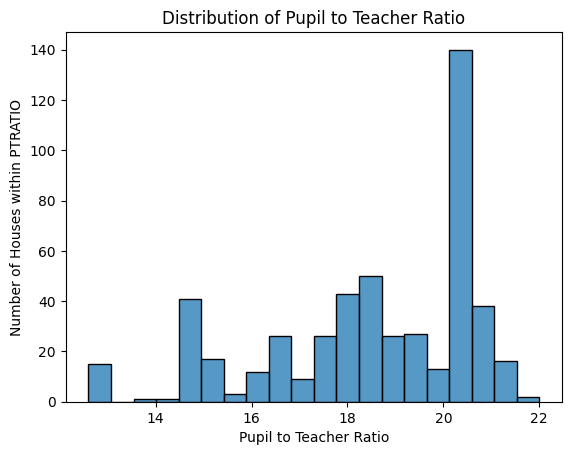

In [13]:
hist=sns.histplot(x="PTRATIO",bins=20,data=boston_df)
hist.set_xlabel("Pupil to Teacher Ratio")
hist.set_ylabel("Number of Houses within PTRATIO")
hist.set_title("Distribution of Pupil to Teacher Ratio")

In [14]:
scipy.stats.levene(
    boston_df[boston_df['CHAS'] == 0]['MEDV'],
    boston_df[boston_df['CHAS'] == 1]['MEDV'],
    center='median'
)

LeveneResult(statistic=4.590342218715871, pvalue=0.03263097600633006)

In [15]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
    boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var=False)

TtestResult(statistic=-3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

In [16]:
thirtyfive=boston_df[boston_df['AgeGroup']=='35 years and below']['MEDV']
between=boston_df[boston_df['AgeGroup']=='Between 35 and 70 years']['MEDV']
seventy=boston_df[boston_df['AgeGroup']=='Above 70 years']['MEDV']

In [17]:
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive,between,seventy)
print("F=Statistic:",f_statistic,"P-value:",p_value)

F=Statistic: 36.40764999196599 P-value: 1.7105011022702984e-15


In [18]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

In [ ]:
Given a p-value of less than 0.05, we reject the null hypothesis that there is no significant relationship between Nitric Oxide Concentrations and Proportion of Non-Retail Business Acres Per Town
Regression Analysis: What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes?

In [19]:
X=boston_df['DIS']
X=sm.add_constant(X)
Y=boston_df['MEDV']
lm=sm.OLS(Y,X).fit()
lm.predict()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 17 Feb 2025   Prob (F-statistic):           1.21e-08
Time:                        19:51:28   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""